In [1]:
# Questions to answer
# For customers that have hit KPIs for a reporting week, what was the corresponding manual counts? Done
# What % of the time are we above farmer counts? 77%
# What avg. % above the farmer counts are we measuring? What is the variance? 1.88

In [21]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import os, json
import matplotlib.pyplot as plt
from datetime import datetime
from research.utils.data_access_utils import RDSAccessUtils, S3AccessUtils
from sklearn.linear_model import LinearRegression

rds_access_utils = RDSAccessUtils(json.load(open(os.environ['PROD_SQL_CREDENTIALS'])))
research_rds_access_utils = RDSAccessUtils(json.load(open(os.environ['DATA_WAREHOUSE_SQL_CREDENTIALS'])))

In [19]:
def fit(X, params):
    return X.dot(params)


def cost_function(params, X, y):
    return np.sum(np.abs(y - fit(X, params)))

In [3]:
df = pd.read_csv('/root/data/bryton/manual_lice_counts.csv')

In [4]:
years = []
weeks = []
af = []
m = []
dates = []
next_dates = []

for index, row in df.iterrows():
    year, week = row['Year/week'].split('/')
    
    years.append(int(year))
    weeks.append(int(week))
    
    r = datetime.strptime(row['Year/week'] + '-1', "%Y/%W-%w")
    dates.append(datetime.strftime(r, '%Y-%m-%d'))
    
    r2 = datetime.strptime(row['Year/week'] + '-2', "%Y/%W-%w")
    next_dates.append(datetime.strftime(r2, '%Y-%m-%d'))
    
    af.append(float(row['Adult female'].replace(',', '.')))
    m.append(float(row['Moving'].replace(',', '.')))
    
df['year'] = years
df['week'] = weeks
df['date'] = dates
df['next_date'] = next_dates
df['af'] = af
df['m'] = m

In [303]:
df['afp'] = df['aaf'] / 2
df['mp'] = df['am'] / (1 + .5 / df['am'])

In [316]:
np.mean(np.abs(df['af'] - df['aaf']))

0.3417118804703082

In [317]:
np.mean(np.abs(df['af'] - df['afp']))

0.15075254546451602

In [323]:
1 - np.mean(np.abs(df['af'] - df['afp'])) / np.mean(np.abs(df['af'] - df['aaf']))

0.5588314188636614

In [314]:
np.mean(np.abs(2 * (df['af'] - df['aaf']) / (df['af'] + df['aaf'])))

1.1250487841287782

In [315]:
np.mean(np.abs(2 * (df['af'] - df['afp']) / (df['af'] + df['afp'])))

1.0171944805443829

In [327]:
# len(set(df['PenID'])), len(set(df['SiteID'])), len(set(df['Year/week']))

mask = df['am'] > 0
np.mean(1 + .5 / df[mask]['am'])

2.3769650152058692

In [322]:
1 - np.mean(np.abs(df['m'] - df['mp'])) / np.mean(np.abs(df['m'] - df['am']))

0.2900749588575713

In [321]:
np.mean(np.abs(df['m'] - df['mp']))

0.2920041597742227

In [309]:
np.mean(np.abs(2 * (df['m'] - df['am']) / (df['m'] + df['am'])))

0.8103303929397171

In [310]:
np.mean(np.abs(2 * (df['m'] - df['mp']) / (df['m'] + df['mp'])))

0.7688759978366637

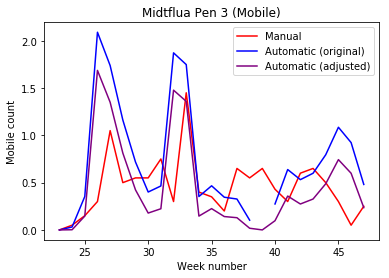

In [283]:
mask = (df['PenID'] == 122)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week']

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Midtflua Pen 3 (Mobile)')
plt.legend()

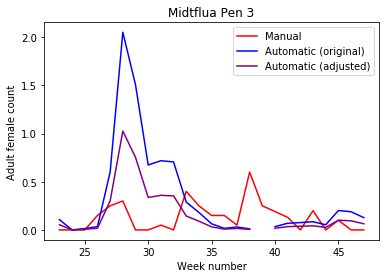

In [250]:
mask = (df['PenID'] == 122)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week']

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Midtflua Pen 3')
plt.legend()

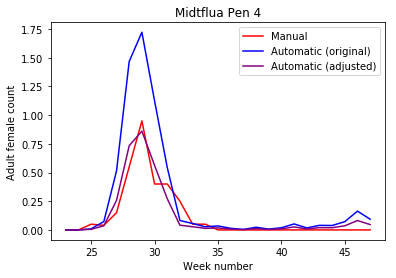

In [252]:
mask = (df['PenID'] == 123)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week']

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Midtflua Pen 4')
plt.legend()

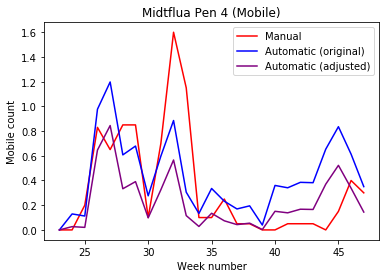

In [285]:
mask = (df['PenID'] == 123)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week']

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Midtflua Pen 4 (Mobile)')
plt.legend()

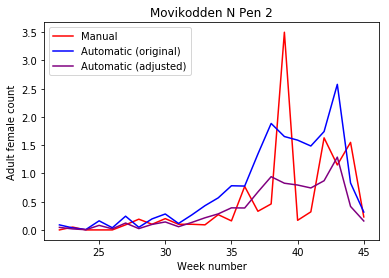

In [253]:
mask = (df['PenID'] == 114)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week']

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Movikodden N Pen 2')
plt.legend()

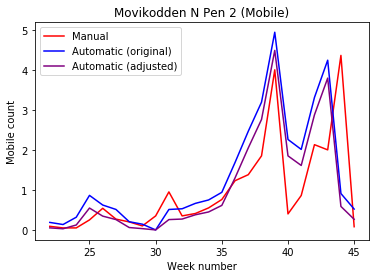

In [286]:
mask = (df['PenID'] == 114)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week']

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Movikodden N Pen 2 (Mobile)')
plt.legend()

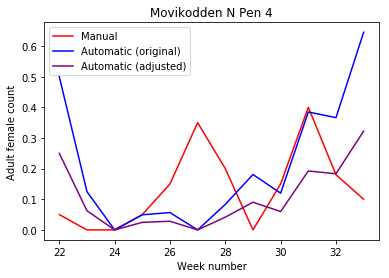

In [272]:
mask = (df['PenID'] == 119) & (df['week'] > 20)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week']

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Movikodden N Pen 4')
plt.legend()

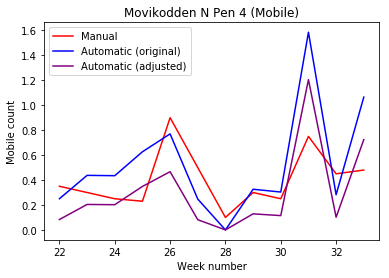

In [287]:
mask = (df['PenID'] == 119) & (df['week'] > 20)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week']

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Movikodden N Pen 4 (Mobile)')
plt.legend()

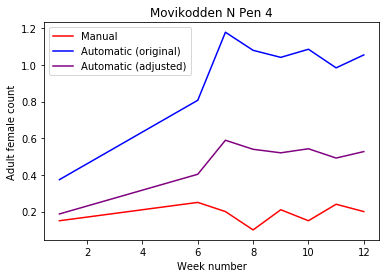

In [279]:
mask = (df['PenID'] == 167) & (df['week'] < 15)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week']

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Movikodden N Pen 4')
plt.legend()

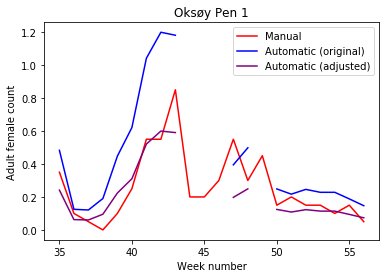

In [266]:
mask = (df['PenID'] == 138)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Oksøy Pen 1')
plt.legend()

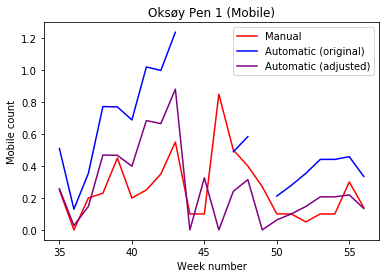

In [289]:
mask = (df['PenID'] == 138)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Oksøy Pen 1 (Mobile)')
plt.legend()

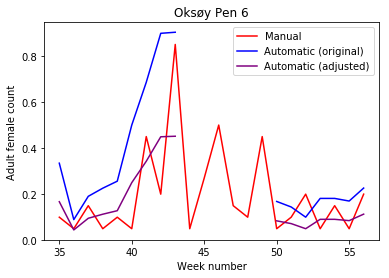

In [267]:
mask = (df['PenID'] == 149)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Oksøy Pen 6')
plt.legend()

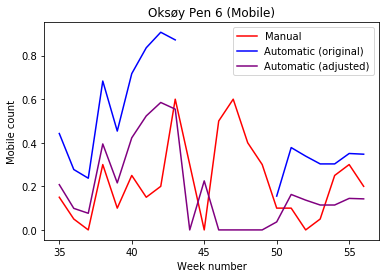

In [290]:
mask = (df['PenID'] == 149)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Oksøy Pen 6 (Mobile)')
plt.legend()

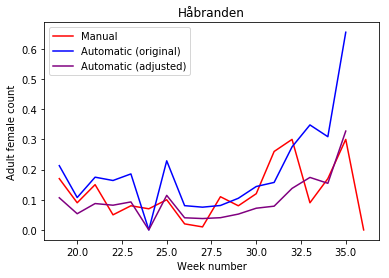

In [268]:
mask = (df['PenID'] == 100)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Håbranden')
plt.legend()

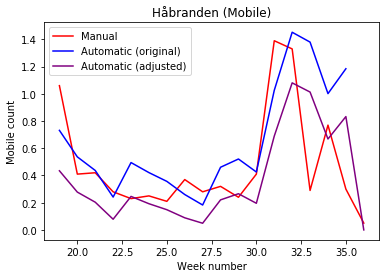

In [291]:
mask = (df['PenID'] == 100)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Håbranden (Mobile)')
plt.legend()

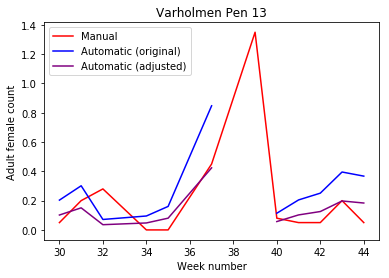

In [269]:
mask = (df['PenID'] == 132)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Varholmen Pen 13')
plt.legend()

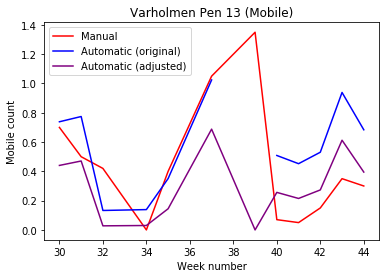

In [292]:
mask = (df['PenID'] == 132)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Varholmen Pen 13 (Mobile)')
plt.legend()

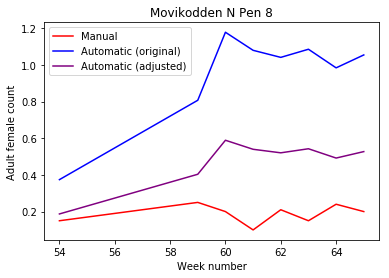

In [264]:
dates = df1['week'] + 53 * (df1['year'] - 2020)

mask = (df['PenID'] == 167) & (dates > 42)

df1 = df[mask]

updated_counts = [ aaf / 2 for aaf in df1['aaf'] ]

plt.plot(dates, df1['af'], color = 'red', label = 'Manual')
plt.plot(dates, df1['aaf'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Adult female count')
plt.title('Movikodden N Pen 8')
plt.legend()

In [ ]:
mask = (df['PenID'] == 132)

df1 = df[mask]

updated_counts = [ am / (1 + .5 / am) if am > 0 else 0 for am in df1['am']  ]

dates = df1['week'] + 53 * (df1['year'] - 2020)

plt.plot(dates, df1['m'], color = 'red', label = 'Manual')
plt.plot(dates, df1['am'], color = 'blue', label = 'Automatic (original)')
plt.plot(dates, updated_counts, color = 'purple', label = 'Automatic (adjusted)')
plt.xlabel('Week number')
plt.ylabel('Mobile count')
plt.title('Varholmen Pen 13 (Mobile)')
plt.legend()

In [10]:
row = df.ix[0]

query = """
       SELECT * FROM day_summaries
        WHERE date = '%s'
        AND pen_id = '%s';
    """ % (row['date'], str(row['PenID']))

df2 = rds_access_utils.extract_from_database(query)



/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


28

In [12]:
aafs = []
ams = []
num = []

for index, row in df.iterrows():
    query = """
           SELECT * FROM day_summaries
            WHERE date = '%s'
            AND pen_id = '%s';
        """ % (row['date'], str(row['PenID']))

    df2 = rds_access_utils.extract_from_database(query)

    if len(df2) == 0:
        aafs.append(None)
        ams.append(None)
        num.append(None)
        
        continue
        
    row = df2.ix[0]['lice_data']

    aaf = row['smartData']['fullAndPartialFishLiceAvgs']['adultFemale']
    am = row['smartData']['fullAndPartialFishLiceAvgs']['mobile']
    n = df2.ix[0]['lice_data']['smartData']['numPartialAndFullFish']
    
    aafs.append(aaf)
    ams.append(am)
    num.append(n)
    
df['aaf'] = aafs
df['am'] = ams
df['num'] = num

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [15]:


df.head()

np.sum(df['num'] >= 75) / len(df)

0.625

0.3256990144802314


Text(0.5, 1.0, 'Manual vs Automatic Lice Counts (Adult Female)')

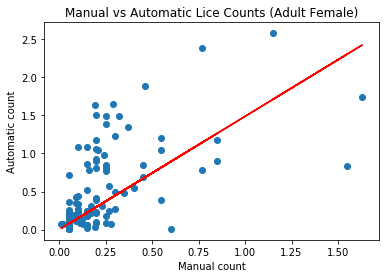

In [23]:
mask = (df['aaf'] < 50) & (df['af'] < 20)  & (df['af'] > 0) & (df['aaf'] > 0) & (df['num'] >= 75)

plt.scatter(df[mask]['af'], df[mask]['aaf'])

X = df[mask]['af'].values.reshape(-1, 1)
y = df[mask]['aaf']

output = minimize(cost_function, 1, args=(X, y))

y_hat = fit(X, output.x)
plt.plot(X, y_hat, color = 'red')

reg = LinearRegression().fit(X, y)

print(reg.score(X, y))

plt.xlabel('Manual count')
plt.ylabel('Automatic count')
plt.title('Manual vs Automatic Lice Counts (Adult Female)')

0.2844662196973218 0.32569901448023114


Text(0.5, 1.0, 'Manual vs Automatic Lice Counts (Adult Female)')

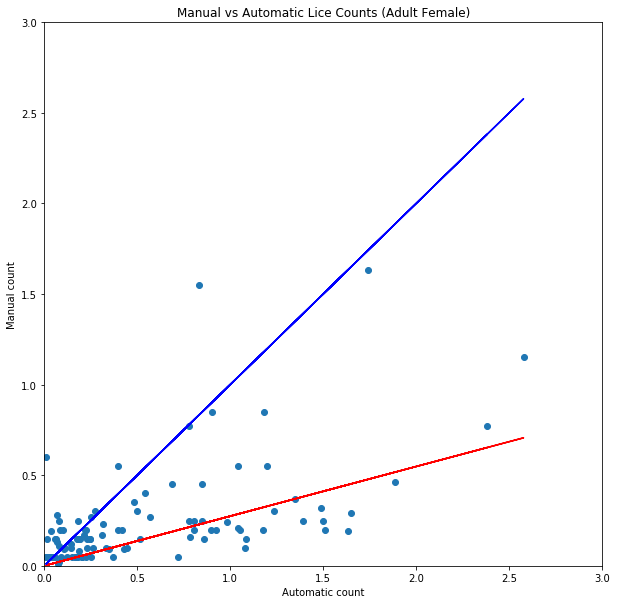

In [94]:
mask = (df['aaf'] < 50) & (df['af'] < 20)  & (df['af'] > 0) & (df['aaf'] > 0) & (df['num'] >= 75)

plt.figure(figsize=(10, 10))
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.scatter(df[mask]['aaf'], df[mask]['af'])

y = df[mask]['af']
X = df[mask]['aaf'].values.reshape(-1, 1)

output = minimize(cost_function, 1, args=(X, y))

y_hat = fit(X, output.x)
plt.plot(X, y_hat, color = 'red')
plt.plot(df[mask]['aaf'], df[mask]['aaf'], color = 'blue')

reg = LinearRegression().fit(X, y)

print(reg.coef_[0], reg.score(X, y))

plt.xlabel('Automatic count')
plt.ylabel('Manual count')
plt.title('Manual vs Automatic Lice Counts (Adult Female)')

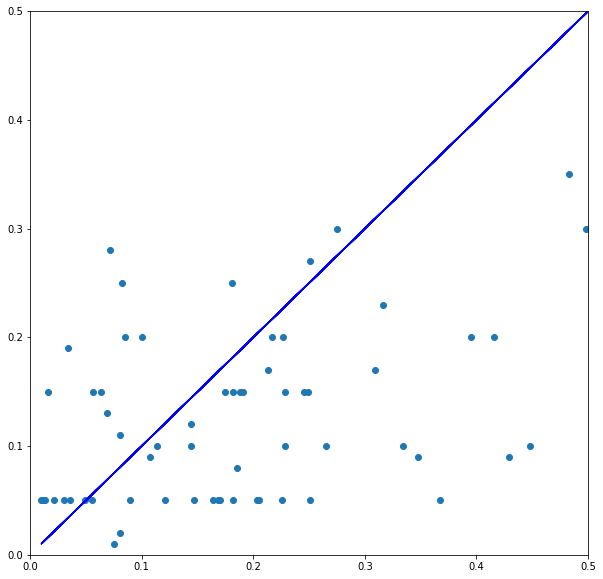

In [124]:
mask = (df['aaf'] < 50) & (df['af'] < 20)  & (df['af'] > 0) & (df['aaf'] > 0) & (df['num'] >= 75)

plt.figure(figsize=(10, 10))
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.scatter(df[mask]['aaf'], df[mask]['af'])
plt.plot(df[mask]['aaf'], df[mask]['aaf'] / 1, color = 'blue')

0.49019607843137253


Text(0.5, 1.0, 'Manual vs Adjusted Automatic Lice Counts (Adult Female)')

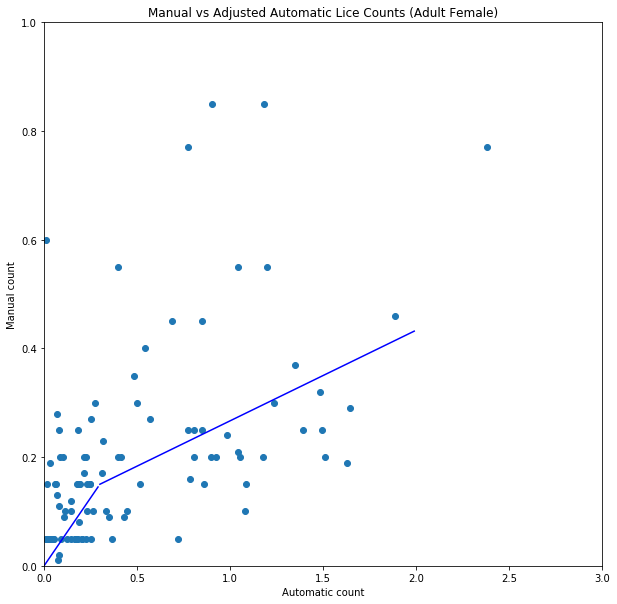

In [119]:
mask = (df['aaf'] < 50) & (df['af'] < 20)  & (df['af'] > 0) & (df['aaf'] > 0) & (df['num'] >= 75)

plt.figure(figsize=(10, 10))
plt.xlim(0, 3)
plt.ylim(0, 1)

factor1 = 2
factor2 = 6
factor3 = 4

breakpoint1 = 0.3
breakpoint2 = 2

path1 = np.arange(0, breakpoint1, .01)
path2 = np.arange(breakpoint1, breakpoint2, .01)
path3 = np.arange(breakpoint2, 2, .01)

plt.scatter(df[mask]['aaf'], df[mask]['af'])
plt.plot(path1, path1 / factor1, color = 'blue')
plt.plot(path2, breakpoint1 / factor1 + (path2 - breakpoint1) / factor2, color = 'blue')
plt.plot(path3, breakpoint1 / factor1 + (breakpoint2 - breakpoint1) / factor2 + (path3 - breakpoint2) / factor3, color = 'blue')

print(np.sum(df[mask]['aaf'] / factor > df[mask]['af']) / np.sum(mask))

plt.xlabel('Automatic count')
plt.ylabel('Manual count')
plt.title('Manual vs Adjusted Automatic Lice Counts (Adult Female)')

0.5196078431372549


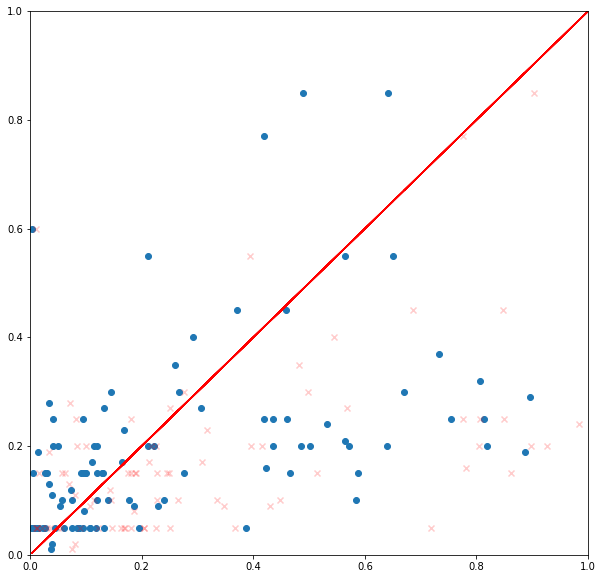

In [180]:
def convert(count):
    if count <= breakpoint1:
        return count / factor1
    elif count <= breakpoint2:
        return breakpoint1 / factor1 + (count - breakpoint1) / factor2
    else:
        return breakpoint1 / factor1 + (breakpoint2 - breakpoint1) / factor2 + (count - breakpoint2) / factor3
    
def convert(count):
    factor = 1.83 + 0.016 / count
    
    return count / factor
    
aaf_adj = [ convert(count) for count in df[mask]['aaf'] ]
    
    
plt.figure(figsize=(10, 10))
plt.xlim(0, 1)
plt.ylim(0, 1)

print(np.sum(aaf_adj > df[mask]['af']) / np.sum(mask))

plt.scatter(aaf_adj, df[mask]['af'])
plt.scatter(df[mask]['aaf'], df[mask]['af'], marker = 'x', color = 'red', alpha = 0.2)
plt.plot(aaf_adj, aaf_adj, color = 'red')

In [330]:
# 1.83, .016
def convert(factor1, factor2, count):
    factor = factor1 + factor2 / count
    
    return count / factor
    
# def convert(factor1, factor2, count):
#     factor = factor1 - factor2 * count
    
#     return count / factor
    
# factor1s = np.arange(1.5, 4, 0.01)
# factor2s = np.arange(0.01, 0.1, 0.001)

factor1s = np.arange(1.5, 2, 0.001)
factor2s = np.arange(0.005, 0.05, 0.001)

highest_pvalue = 0
best_factor1 = None
best_factor2 = None

print(len(factor1s), len(factor2s))

for factor1 in factor1s:
    for factor2 in factor2s:
        aaf_adj = [ convert(factor1, factor2, count) for count in df[mask]['aaf'] ]

        res = stats.ks_2samp(df[mask]['af'], aaf_adj)
        pvalue = res.pvalue
        
        if pvalue > highest_pvalue:
            print(pvalue, factor1, factor2)
            
            highest_pvalue, best_factor1, best_factor2 = (pvalue, factor1, factor2)

500 46
0.0003045803026653497 1.5 0.005


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [226]:
# 1.83, .016
def convert(factor1, factor2, count):
    factor = factor1 + factor2 / count
    
    return count / factor

factor1s = np.arange(.5, 1.5, 0.01)
factor2s = np.arange(.25, .75, 0.001)

highest_pvalue = 0
best_factor1 = None
best_factor2 = None

print(len(factor1s), len(factor2s))

for factor1 in factor1s:
    for factor2 in factor2s:
        aaf_adj = [ convert(factor1, factor2, count) for count in df[mask]['am'] ]

        res = stats.ks_2samp(df[mask]['m'], aaf_adj)
        pvalue = res.pvalue
        
        if pvalue > highest_pvalue:
            print(pvalue, factor1, factor2)
            
            highest_pvalue, best_factor1, best_factor2 = (pvalue, factor1, factor2)

100 500
4.16436827601249e-06 0.5 0.25
8.034781144306451e-06 0.5 0.251
1.5228713099092461e-05 0.5 0.252
2.8356914046585953e-05 0.5 0.263
5.188026319886739e-05 0.5 0.278
9.326788889683897e-05 0.5 0.29700000000000004
0.00016477327038440017 0.5 0.29800000000000004
0.00028608985407384534 0.5 0.30400000000000005
0.00048821855531998857 0.5 0.33000000000000007
0.0008189472540697335 0.5 0.3400000000000001
0.001350391748602554 0.5 0.3550000000000001
0.002189056096735366 0.5 0.39900000000000013
0.0034888081470730707 0.5 0.41100000000000014
0.005466998287082121 0.5 0.42700000000000016
0.00842363993706749 0.5 0.4450000000000002
0.012763089246417064 0.5 0.4630000000000002
0.01901699488491434 0.5 0.4750000000000002
0.02786644886880561 0.5 0.4880000000000002
0.04016029903677628 0.5 0.5140000000000002
0.05692554481493753 0.5 0.5280000000000002
0.07936465968200286 0.5 0.5590000000000003
0.10883344427334152 0.5 0.5800000000000003
0.14679114089728007 0.5 0.6010000000000003
0.19471101264309332 0.5 0.651000

1.2594070152642479e-12


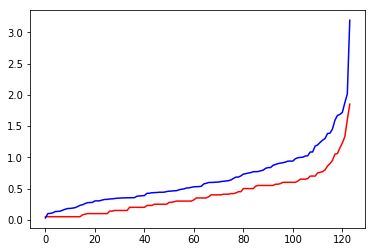

In [222]:
plt.plot(sorted(df[mask]['m']), color = 'red')
plt.plot(sorted(df[mask]['am']), color = 'blue')

res = stats.ks_2samp(df[mask]['am'], df[mask]['aaf'])
pvalue = res.pvalue
print(pvalue)    

1.5 0.005
0.5838532077337623


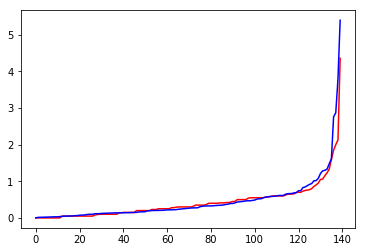

In [337]:
print(best_factor1, best_factor2)

mask = df['num'] >= 75
aaf_adj = [ count / (1 + .5 / count) for count in df[mask]['am'] ]

res = stats.ks_2samp(df[mask]['m'], aaf_adj)
pvalue = res.pvalue
print(pvalue)    

plt.plot(sorted(df[mask]['m']), color = 'red')
plt.plot(sorted(aaf_adj), color = 'blue')

0.8300000000000003 0.5140000000000002
0.07568715714596005


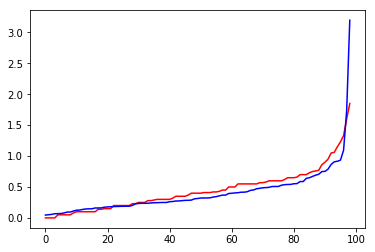

In [297]:
print(best_factor1, best_factor2)

aaf_adj = [ convert(1.83, 0.017, count) for count in df[mask]['am'] ]

res = stats.ks_2samp(df[mask]['m'], aaf_adj)
pvalue = res.pvalue
print(pvalue)    

plt.plot(sorted(df[mask]['m']), color = 'red')
plt.plot(sorted(aaf_adj), color = 'blue')

In [165]:
from scipy import stats

res = stats.ks_2samp(df[mask]['af'], df[mask]['aaf'])
print(res.pvalue)

res = stats.ks_2samp(df[mask]['af'], aaf_adj)
print(res.pvalue)

7.744270929833141e-05
0.00086424480834294


7.744270929833141e-05


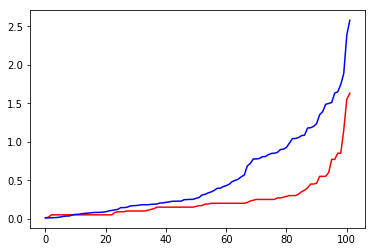

In [178]:
plt.plot(sorted(df[mask]['af']), color = 'red')
plt.plot(sorted(df[mask]['aaf']), color = 'blue')

res = stats.ks_2samp(df[mask]['af'], df[mask]['aaf'])
pvalue = res.pvalue
print(pvalue)    

0.8300000000000003 0.5140000000000002
0.051956300538595804


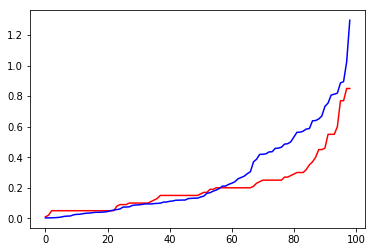

In [296]:
print(best_factor1, best_factor2)

aaf_adj = [ convert(best_factor1, best_factor2, count) for count in df[mask]['aaf'] ]

res = stats.ks_2samp(df[mask]['af'], aaf_adj)
pvalue = res.pvalue
print(pvalue)    

plt.plot(sorted(df[mask]['af']), color = 'red')
plt.plot(sorted(aaf_adj), color = 'blue')

(array([1.14727522, 0.06235191, 0.01247038, 0.01247038, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.  , 0.81, 1.62, 2.43, 3.24, 4.05, 4.86, 5.67, 6.48, 7.29, 8.1 ]),
 <a list of 10 Patch objects>)

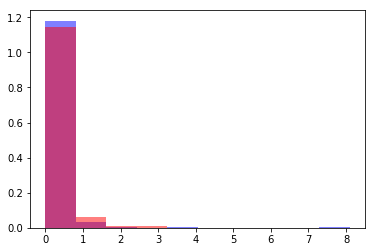

In [328]:
# plt.scatter(df[mask]['af'], aaf_adj)
# plt.plot(aaf_adj, aaf_adj)

counts, bins, _ = plt.hist(df[mask]['af'], color = 'blue', alpha = 0.5, density = True)
plt.hist(aaf_adj, color = 'red', bins = bins, alpha = 0.5, density = True)

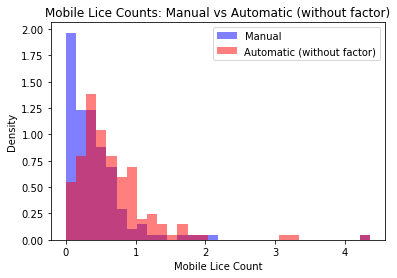

In [350]:
# plt.scatter(df[mask]['af'], aaf_adj)
# plt.plot(aaf_adj, aaf_adj)
mask = df['num'] >= 75
counts, bins, _ = plt.hist(df[mask]['m'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
plt.hist(df[mask]['am'], color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic (without factor)')
plt.ylabel('Density')
plt.xlabel('Mobile Lice Count')
plt.title('Mobile Lice Counts: Manual vs Automatic (without factor)')
plt.legend()

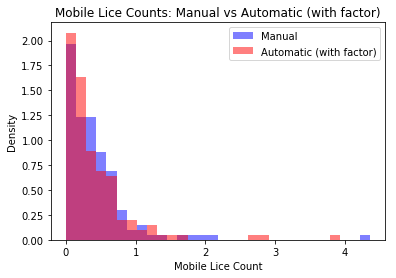

In [348]:
# plt.scatter(df[mask]['af'], aaf_adj)
# plt.plot(aaf_adj, aaf_adj)
mask = df['num'] >= 75
counts, bins, _ = plt.hist(df[mask]['m'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
plt.hist(aaf_adj, color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic (with factor)')
plt.ylabel('Density')
plt.xlabel('Mobile Lice Count')
plt.title('Mobile Lice Counts: Manual vs Automatic (with factor)')
plt.legend()

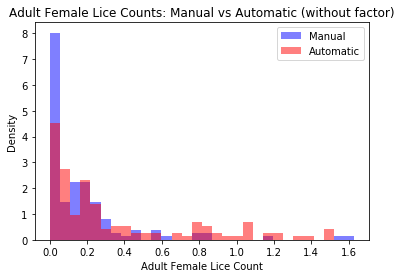

In [349]:
mask = df['num'] >= 75
counts, bins, _ = plt.hist(df[mask]['af'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
plt.hist(df[mask]['aaf'], color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic')
plt.ylabel('Density')
plt.xlabel('Adult Female Lice Count')
plt.title('Adult Female Lice Counts: Manual vs Automatic (without factor)')
plt.legend()

In [401]:
mask = df['num'] >= 75

np.sum(mask)

140

In [405]:
np.sum(df[mask]['aaf'] / 2 > df[mask]['af'])/np.sum(mask)

0.6071428571428571

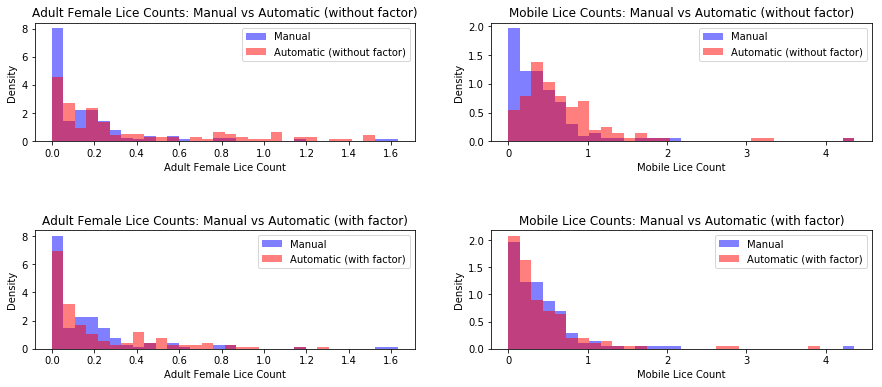

In [371]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))

fig.subplots_adjust(hspace=.75)

mask = df['num'] >= 75
counts, bins, _ = ax[0, 0].hist(df[mask]['af'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
ax[0, 0].hist(df[mask]['aaf'], color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic (without factor)')
ax[0, 0].set_ylabel('Density')
ax[0, 0].set_xlabel('Adult Female Lice Count')
ax[0, 0].set_title('Adult Female Lice Counts: Manual vs Automatic (without factor)')
ax[0, 0].legend()

counts, bins, _ = ax[1, 0].hist(df[mask]['af'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
ax[1, 0].hist(df[mask]['aaf'] / 2, color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic (with factor)')
ax[1, 0].set_ylabel('Density')
ax[1, 0].set_xlabel('Adult Female Lice Count')
ax[1, 0].set_title('Adult Female Lice Counts: Manual vs Automatic (with factor)')
ax[1, 0].legend()

counts, bins, _ = ax[0, 1].hist(df[mask]['m'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
ax[0, 1].hist(df[mask]['am'], color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic (without factor)')
ax[0, 1].set_ylabel('Density')
ax[0, 1].set_xlabel('Mobile Lice Count')
ax[0, 1].set_title('Mobile Lice Counts: Manual vs Automatic (without factor)')
ax[0, 1].legend()

counts, bins, _ = ax[1, 1].hist(df[mask]['m'], color = 'blue', bins = 30, alpha = 0.5, density = True, label='Manual')
ax[1, 1].hist(aaf_adj, color = 'red', bins = bins, alpha = 0.5, density = True, label='Automatic (with factor)')
ax[1, 1].set_ylabel('Density')
ax[1, 1].set_xlabel('Mobile Lice Count')
ax[1, 1].set_title('Mobile Lice Counts: Manual vs Automatic (with factor)')
ax[1, 1].legend()

In [302]:
res = stats.ks_2samp(df[mask]['af'], df[mask]['aaf'])
pvalue = res.pvalue
print(pvalue) 

5.637984285781504e-05


0.051956300538595804


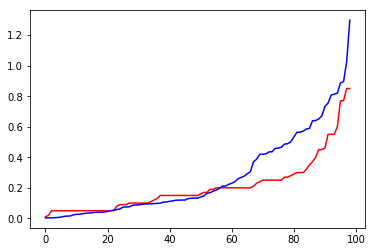

In [198]:
def convert(factor1, factor2, count):
    factor = factor1 + factor2 / count
    
    return count / factor

aaf_adj = [ convert(1.83, 0.016, count) for count in df[mask]['aaf'] ]

res = stats.ks_2samp(df[mask]['af'], aaf_adj)
pvalue = res.pvalue
print(pvalue)    

plt.plot(sorted(df[mask]['af']), color = 'red')
plt.plot(sorted(aaf_adj), color = 'blue')

0.01715088991499295


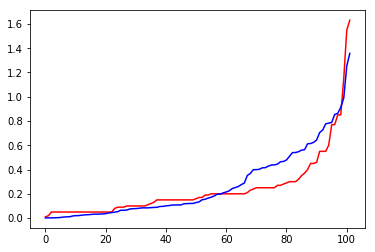

In [177]:
aaf_adj = [ convert(1.88, 0.05, count) for count in df[mask]['aaf'] ]

res = stats.ks_2samp(df[mask]['af'], aaf_adj)
pvalue = res.pvalue
print(pvalue)    

plt.plot(sorted(df[mask]['af']), color = 'red')
plt.plot(sorted(aaf_adj), color = 'blue')

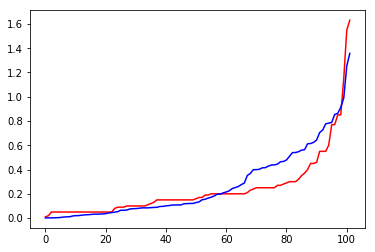

In [153]:
plt.plot(sorted(df[mask]['af']), color = 'red')
plt.plot(sorted(aaf_adj), color = 'blue')

0.44941573245533883


Text(0.5, 1.0, 'Manual vs Automatic Lice Counts (Mobile)')

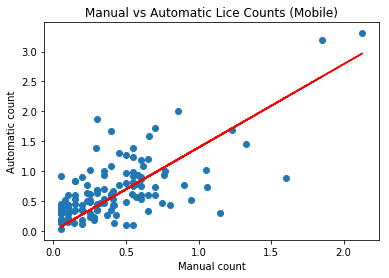

In [64]:
mask = (df['am'] < 4) & (df['m'] < 3) & (df['m'] > 0) & (df['am'] > 0) & (df['num'] >= 75)
plt.scatter(df[mask]['m'], df[mask]['am'])

X = df[mask]['m'].values.reshape(-1, 1)
y = df[mask]['am']

output = minimize(cost_function, 1, args=(X, y))

y_hat = fit(X, output.x)
plt.plot(X, y_hat, color = 'red')

reg = LinearRegression().fit(X, y)

print(reg.score(X, y))

plt.xlabel('Manual count')
plt.ylabel('Automatic count')
plt.title('Manual vs Automatic Lice Counts (Mobile)')

In [387]:
cutoffsm = np.arange(0.1, 2, 0.01)
cutoffsaf = np.arange(0, 1, 0.01)

In [386]:
cutoffsm = np.arange(0.1, 2, 0.01)

vals1 = []
vals2m = []

for cutoff in cutoffs:
    mask = (df['am'] < 4) & (df['m'] < 3) & (df['m'] < cutoff) & (df['m'] > 0) & (df['am'] > 0) & (df['num'] >= 75)

    df2 = df[mask]
    
    X = df2['m'].values.reshape(-1, 1)
    y = df2['am']

    reg = LinearRegression().fit(X, y)

    vals1.append(reg.coef_[0])
    
    output = minimize(cost_function, reg.coef_[0], args=(X, y))

    vals2m.append(output.x)

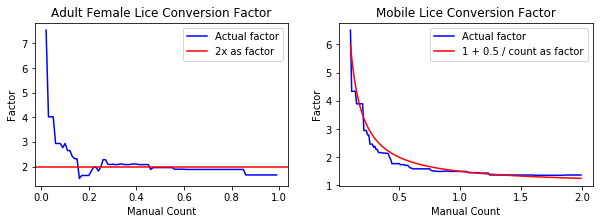

In [394]:
fig, ax = plt.subplots(1, 2, figsize=(10,  3))

ax[0].plot(cutoffsaf, vals2, color = 'blue', label='Actual factor')
ax[0].axhline(2, color = 'red', label='2x as factor')
ax[0].set_title('Adult Female Lice Conversion Factor')
ax[0].set_xlabel('Manual Count')
ax[0].set_ylabel('Factor')
ax[0].legend()

# plt.plot(cutoffs, vals1, color = 'red')
ax[1].plot(cutoffsm, vals2m, color = 'blue', label='Actual factor')
ax[1].plot(cutoffsm, 1 + 0.5 / cutoffs, color = 'red', label='1 + 0.5 / count as factor')
# plt.plot(cutoffs, .83 + 0.514 / cutoffs, color = 'red')
# plt.plot(cutoffs, .9 + 0.45 / cutoffs, color = 'orange')
ax[1].set_title('Mobile Lice Conversion Factor')
ax[1].set_xlabel('Manual Count')
ax[1].set_ylabel('Factor')
ax[1].legend()

In [374]:
for cutoff in cutoffs:
    print(cutoff, 1.83 + 0.016 / cutoff)

0.1 1.99
0.11 1.9754545454545456
0.12 1.9633333333333334
0.13 1.9530769230769232
0.13999999999999999 1.9442857142857144
0.14999999999999997 1.9366666666666668
0.15999999999999998 1.9300000000000002
0.16999999999999998 1.9241176470588237
0.17999999999999997 1.918888888888889
0.18999999999999995 1.9142105263157896
0.19999999999999996 1.9100000000000001
0.20999999999999996 1.9061904761904762
0.21999999999999995 1.9027272727272728
0.22999999999999995 1.8995652173913045
0.23999999999999994 1.8966666666666667
0.24999999999999992 1.8940000000000001
0.2599999999999999 1.8915384615384616
0.2699999999999999 1.8892592592592594
0.2799999999999999 1.8871428571428572
0.2899999999999999 1.8851724137931036
0.29999999999999993 1.8833333333333333
0.30999999999999994 1.8816129032258064
0.3199999999999999 1.8800000000000001
0.32999999999999985 1.8784848484848486
0.33999999999999986 1.877058823529412
0.34999999999999987 1.875714285714286
0.3599999999999999 1.8744444444444446
0.3699999999999999 1.8732432432

In [240]:
for cutoff in cutoffs:
    print(cutoff, .9 + 0.45 / cutoff)

0.1 5.4
0.11 4.990909090909091
0.12 4.65
0.13 4.361538461538462
0.13999999999999999 4.114285714285715
0.14999999999999997 3.900000000000001
0.15999999999999998 3.7125000000000004
0.16999999999999998 3.547058823529412
0.17999999999999997 3.4000000000000004
0.18999999999999995 3.2684210526315796
0.19999999999999996 3.1500000000000004
0.20999999999999996 3.042857142857143
0.21999999999999995 2.9454545454545458
0.22999999999999995 2.8565217391304354
0.23999999999999994 2.7750000000000004
0.24999999999999992 2.7000000000000006
0.2599999999999999 2.6307692307692316
0.2699999999999999 2.5666666666666673
0.2799999999999999 2.5071428571428576
0.2899999999999999 2.451724137931035
0.29999999999999993 2.4000000000000004
0.30999999999999994 2.351612903225807
0.3199999999999999 2.3062500000000004
0.32999999999999985 2.263636363636364
0.33999999999999986 2.2235294117647064
0.34999999999999987 2.1857142857142864
0.3599999999999999 2.1500000000000004
0.3699999999999999 2.1162162162162166
0.379999999999

In [217]:
cutoffs = np.arange(0.2, 2, 0.05)

vals1 = []
vals2 = []

for cutoff in cutoffs:
    mask = (df['am'] < 4) & (df['m'] < 3) & (df['m'] < cutoff) & (df['m'] > 0) & (df['am'] > 0) & (df['num'] >= 75)

    df2 = df[mask]
    
    y = df2['m']
    X = df2['am'].values.reshape(-1, 1)

    reg = LinearRegression().fit(X, y)

    vals1.append(reg.coef_[0])
    
    output = minimize(cost_function, reg.coef_[0], args=(X, y))

    vals2.append(output.x)

Text(0, 0.5, 'Factor')

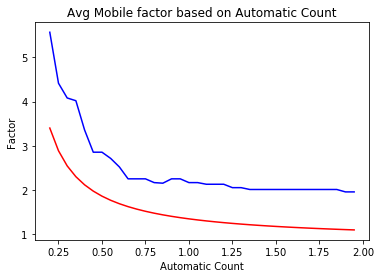

In [228]:
# plt.plot(cutoffs, vals1, color = 'red')
plt.plot(cutoffs, 1.0 / np.array(vals2), color = 'blue')
plt.plot(cutoffs, .83 + 0.514 / cutoffs, color = 'red')
plt.title('Avg Mobile factor based on Automatic Count')
plt.xlabel('Automatic Count')
plt.ylabel('Factor')

In [379]:
cutoffs = np.arange(0, 1, 0.01)

vals1 = []
vals2 = []

for cutoff in cutoffs:
    mask = (df['aaf'] < 5) & (df['af'] < cutoff) & (df['af'] > 0) & (df['aaf'] > 0) & (df['num'] >= 75)

    df2 = df[mask]
    
    if len(df2) == 0:
        vals1.append(None)
        vals2.append(None)
        continue
    
    X = df2['af'].values.reshape(-1, 1)
    y = df2['aaf']

    reg = LinearRegression().fit(X, y)

    vals1.append(reg.coef_[0])
    
    output = minimize(cost_function, reg.coef_[0], args=(X, y))

    vals2.append(output.x)

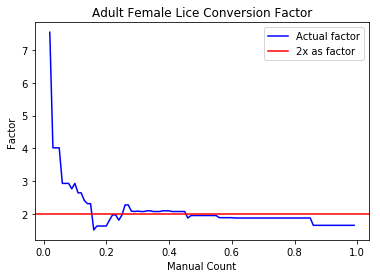

In [385]:
plt.plot(cutoffs, vals2, color = 'blue', label='Actual factor')
plt.axhline(2, color = 'red', label='2x as factor')
plt.title('Adult Female Lice Conversion Factor')
plt.xlabel('Manual Count')
plt.ylabel('Factor')
plt.legend()

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'Factor')

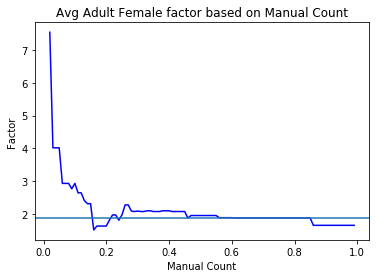

In [183]:
# plt.plot(cutoffs, vals1, color = 'red')
plt.plot(cutoffs, vals2, color = 'blue')
plt.axhline(1.88)
plt.title('Avg Adult Female factor based on Manual Count')
plt.xlabel('Manual Count')
plt.ylabel('Factor')

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Factor')

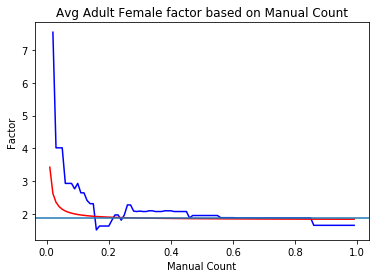

In [294]:
# plt.plot(cutoffs, vals1, color = 'red')
plt.plot(cutoffs, vals2, color = 'blue')
plt.plot(cutoffs, 1.83 + 0.016 / cutoffs, color = 'red')
plt.axhline(1.88)
plt.title('Avg Adult Female factor based on Manual Count')
plt.xlabel('Manual Count')
plt.ylabel('Factor')

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'Factor')

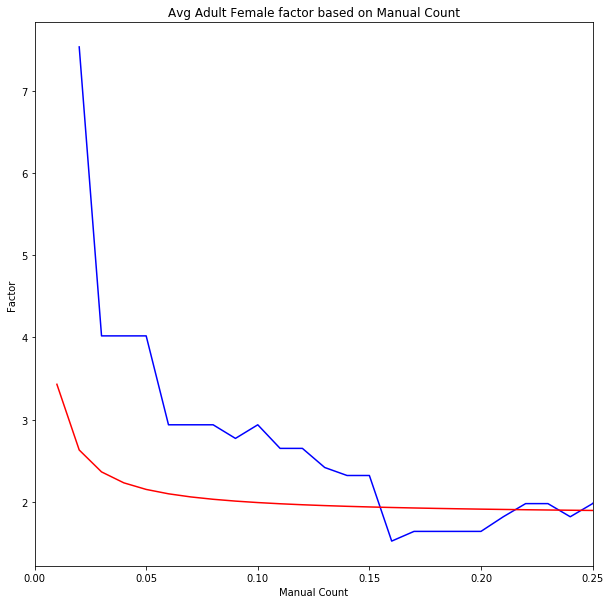

In [185]:
plt.figure(figsize=(10, 10))
plt.xlim(0, 0.25)

# plt.plot(cutoffs, vals1, color = 'red')
plt.plot(cutoffs, vals2, color = 'blue')
plt.plot(cutoffs, 1.83 + 0.016 / cutoffs, color = 'red')
plt.title('Avg Adult Female factor based on Manual Count')
plt.xlabel('Manual Count')
plt.ylabel('Factor')

In [145]:
cutoffs = np.arange(0.02, 2, 0.01)

vals1 = []
vals2 = []

for cutoff in cutoffs:
    mask = (df['aaf'] < 5) & (df['af'] < cutoff) & (df['af'] > 0) & (df['aaf'] > 0) & (df['num'] >= 75)

    df2 = df[mask]
    
    if len(df2) == 0:
        vals1.append(None)
        vals2.append(None)
        continue
        
    y = df2['af']
    X = df2['aaf'].values.reshape(-1, 1)

    reg = LinearRegression().fit(X, y)

    vals1.append(reg.coef_[0])
    
    output = minimize(cost_function, reg.coef_[0], args=(X, y))

    vals2.append(output.x)

Text(0, 0.5, 'Factor')

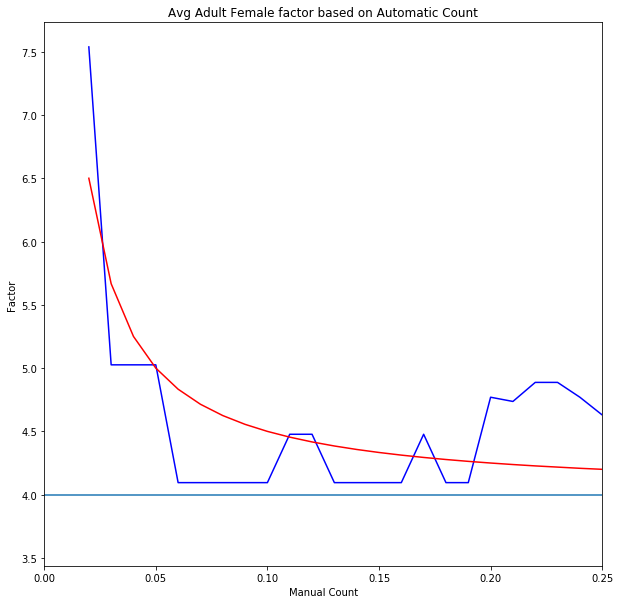

In [148]:
plt.figure(figsize=(10, 10))
plt.xlim(0, 0.25)

# plt.plot(cutoffs, vals1, color = 'red')
plt.plot(cutoffs, 1 / np.array(vals2), color = 'blue')
plt.plot(cutoffs, 4 + 0.05 / cutoffs, color = 'red')
plt.axhline(4)
plt.title('Avg Adult Female factor based on Automatic Count')
plt.xlabel('Manual Count')
plt.ylabel('Factor')

Text(0, 0.5, 'Factor')

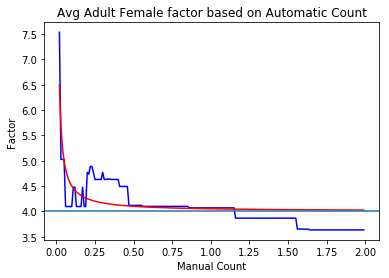

In [149]:
# plt.plot(cutoffs, vals1, color = 'red')
plt.plot(cutoffs, 1 / np.array(vals2), color = 'blue')
plt.plot(cutoffs, 4 + 0.05 / cutoffs, color = 'red')
plt.axhline(4)
plt.title('Avg Adult Female factor based on Automatic Count')
plt.xlabel('Manual Count')
plt.ylabel('Factor')

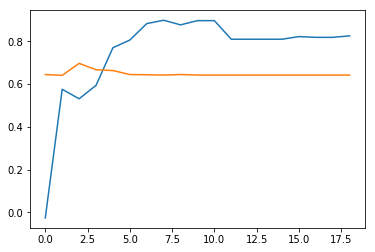

In [101]:
plt.plot(vals1)
plt.plot(vals2)

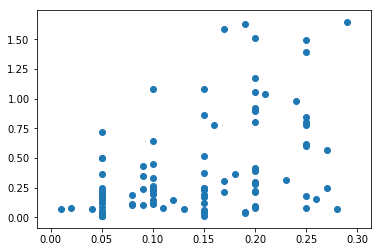

In [97]:


mask = (df['aaf'] < 5) & (df['af'] < 0.3) & (df['af'] > 0) & (df['aaf'] > 0)

df2 = df[mask]

plt.scatter(df2['af'], df2['aaf'])

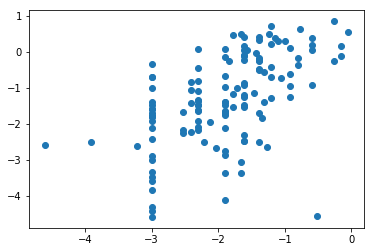

In [84]:
plt.scatter(np.log(df2['af']), np.log(df2['aaf']))

In [85]:

X = np.log(df2['af'].values.reshape(-1, 1))
y = np.log(df2['aaf'])

reg = LinearRegression().fit(X, y)

reg.coef_, reg.score(X, y)

(array([0.82532333]), 0.29395302558972436)

In [98]:
from sklearn.linear_model import LinearRegression

X = df2['af'].values.reshape(-1, 1)
y = df2['aaf']

reg = LinearRegression().fit(X, y)

reg.coef_, reg.score(X, y)

(array([2.58410105]), 0.2171650704789233)

In [96]:
output = minimize(cost_function, 2, args=(X, y))

y_hat = fit(X, output.x)

print(output.x)

[1.97718107]


In [86]:
output = minimize(cost_function, 1, args=(X, y))

y_hat = fit(X, output.x)

print(output.x)

[0.64179817]


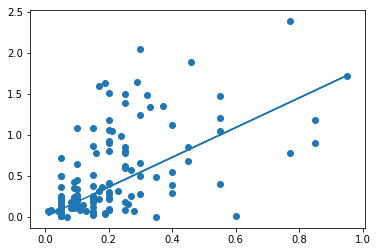

In [80]:
plt.scatter(df2['af'], df2['aaf'])
plt.plot(X, y_hat)

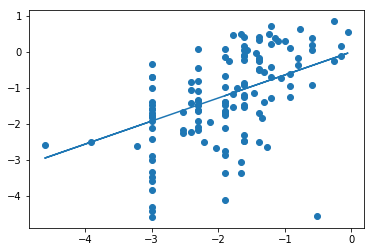

In [87]:
plt.scatter(np.log(df2['af']), np.log(df2['aaf']))
plt.plot(X, y_hat)

In [132]:
np.sum(df2['am'] > df2['m']) / len(df2)

0.7914110429447853

In [169]:
row = df.ix[90]

row

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


SiteID                         60
PenID                         114
Site name            Movikodden N
Pen                             2
Year/week                 2020/45
Adult female                 0.23
Moving                       0.08
Fixed                           0
Caligus/ Scottish             NaN
year                         2020
week                           45
date                   2020-11-09
next_date              2020-11-10
af                           0.23
m                            0.08
Name: 90, dtype: object

In [165]:
query = """
   SELECT * FROM prod.crop_annotation
    WHERE captured_at > '%s'
    AND captured_at < '%s'
    AND service_id = 1
    AND annotation_state_id = 7
    AND pen_id = '%s';
""" % (row['date'], row['next_date'], str(row['PenID']))

print(query)

df2 = research_rds_access_utils.extract_from_database(query)


   SELECT * FROM prod.crop_annotation
    WHERE captured_at > '2020-06-08'
    AND captured_at < '2020-06-09'
    AND service_id = 1
    AND annotation_state_id = 7
    AND pen_id = '122';



In [164]:
df2.head()

""
